In [1]:
import numpy as np
import player_information as pi
import analytics as an
import pandas as pd

In [71]:
# Initialize database (get_all_perms), record initial avg coef
score_0 = []
score_end = []
coef_0 = []
coef_end = []
all_coefs = []
all_scores = []
ranks = []
prob_range = []
error_count = 0

for i in range(0,1000):
    
    try:
        team_A_df = pi.create_rand_team(5)
        team_B_df = pi.create_rand_team(5)
        teamsA = team_A_df
        teamsB = team_B_df

        pi.init_db(team_A_df, team_B_df)

        scores = np.zeros(5)
        coefs = np.zeros(5)
        # pick1

        con = pi.open_sql_con()

        team_A_df = an.load_team_a(con)
        team_B_df = an.load_team_b(con)

        #stds = an.calc_stds_coef(con, team_A_df, team_B_df)     #for app method
        #id_1a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_1a = stds['id_a'].iloc[0]                            #for app method
        #id_1a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        
        id_1a = np.random.choice(team_A_df['a_id'].values)    #for similar skills

        pj = an.agg_scores_init(con)
        cj = an.agg_coefs_init(con)
        scores[0] = pj['r1'].mean()
        coefs[0] = cj['r1'].mean()
        coef_perms0 = cj['r1']
        
        prob_range.append(cj['r1'].max() - cj['r1'].min())

        # line1, random choice

        (player_1a, player_1a_id) = an.get_prev_player(con, id_1a, 'team_a')

        poss = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1a, player_1a_id, 0, poss)

        id_1b = np.random.choice(team_B_df['b_id'].values)

        # line2, random choice, calc new coef

        (player_1b, player_1b_id) = an.get_prev_player(con, id_1b, 'team_b')

        poss = [2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1b, player_1b_id, 1, poss)

        team_B_df = an.load_team(con, 'b')
        lineup = an.get_lineup(con)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[1] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[1] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms1 = cj[~cj['r2'].isna()]['r2']

        id_2b = np.random.choice(team_B_df['b_id'].values)

        # pick2

        (player_2b, player_2b_id) = an.get_prev_player(con, id_2b, 'team_b')

        poss = [2, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2b, player_2b_id, 3, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')

        #team_A_df = an.calc_coefs(con, team_A_df, player_2b, player_2b_id)        #for app method
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_2b, player_2b_id)
        #id_2a = team_A_df['id_a'].iloc[0]                                         #for app method
        id_2a = an.similar_skills(con, player_2b_id)                           #for similar skills

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)

        # pick3, calc new coef

        (player_2a, player_2a_id) = an.get_prev_player(con, id_2a, 'team_a')

        poss = [4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2a, player_2a_id, 2, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        #stds = an.calc_stds_coef(con, team_A_df, team_B_df)        #for app method
        #id_3a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_3a = stds['id_a'].iloc[0]                               #for app method
        #id_3a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        id_3a = np.random.choice(team_A_df['a_id'].values)          #for similar skills

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[2] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[2] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms2 = cj[~cj['r2'].isna()]['r2']

        # line3

        (player_3a, player_3a_id) = an.get_prev_player(con, id_3a, 'team_a')

        poss = [5, 6, 7, 8, 9]
        an.update_lineup(con, player_3a, player_3a_id, 4, poss)

        team_B_df = an.load_team(con, 'b')

        id_3b = np.random.choice(team_B_df['b_id'].values)

        # line4, calc new coef

        (player_3b, player_3b_id) = an.get_prev_player(con, id_3b, 'team_b')

        poss = [6, 7, 8, 9]
        an.update_lineup(con, player_3b, player_3b_id, 5, poss)

        team_B_df = an.load_team(con, 'b')

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[3] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[3] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms3 = cj[~cj['r2'].isna()]['r2']

        id_4b = np.random.choice(team_B_df['b_id'].values)

        # pick4

        (player_4b, player_4b_id) = an.get_prev_player(con, id_4b, 'team_b')

        poss = [6, 8, 9]
        an.update_lineup(con, player_4b, player_4b_id, 7, poss)

        team_A_df = an.load_team(con, 'a')

        #team_A_df = an.calc_coefs(con, team_A_df, player_4b, player_4b_id)        #for app method
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_4b, player_4b_id)
        #id_4a = team_A_df['id_a'].iloc[0]                                         #for app method
        id_4a = an.similar_skills(con, player_4b_id)                             #for similar skills


        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)



        # pick5, calc new coef

        (player_4a, player_4a_id) = an.get_prev_player(con, id_4a, 'team_a')

        poss = [8, 9]
        an.update_lineup(con, player_4a, player_4a_id, 6, poss)

        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[4] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[4] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms4 = cj[~cj['r2'].isna()]['r2']

        rank = coef_perms0.rank(ascending=False)[coef_perms0==coefs[4]].iloc[0]

        # line5

        con.close()

        coef_0.append(coefs[0])
        coef_end.append(coefs[4])
        score_0.append(scores[0])
        score_end.append(scores[4])
        all_coefs.append(coefs)
        all_scores.append(scores)
        ranks.append(rank)
    except:
        con.close()
        error_count +=1

## Team b picks first

In [4]:
# Initialize database (get_all_perms), record initial avg coef
score_0 = []
score_end = []
coef_0 = []
coef_end = []
all_coefs = []
all_scores = []
ranks = []
error_count = 0

for i in range(0,10):
    
    try:
        team_A_df = pi.create_rand_team(5)
        team_B_df = pi.create_rand_team(5)
        teamsA = team_A_df
        teamsB = team_B_df

        pi.get_all_perms(team_A_df, team_B_df)

        scores = np.zeros(5)
        coefs = np.zeros(5)
        
        # line1, random
        
        con = pi.open_sql_con()
        
        team_A_df = an.load_team_a(con)
        team_B_df = an.load_team_b(con)
        
        id_1b = np.random.choice(team_B_df['b_id'].values)
        
        pj = an.agg_scores_init(con)
        cj = an.agg_coefs_init(con)
        scores[0] = pj['r1'].mean()
        coefs[0] = cj['r1'].mean()
        coef_perms0 = cj['r1']
        
        # pick1, respond
        
        (player_1b, player_1b_id) = an.get_prev_player(con, id_1b, 'team_b')

        poss = [0, 2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1b, player_1b_id, 1, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')

        team_A_df = an.calc_coefs(con, team_A_df, player_1b, player_1b_id)
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_2b, player_2b_id)
        id_1a = team_A_df['a_id'].iloc[0]
        #id_2a = an.similar_skills(con, player_2b_id)
        
        # pick2, put up
        
        (player_1a, player_1a_id) = an.get_prev_player(con, id_1a, 'team_a')

        poss = [2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1a, player_1a_id, 0, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)
        id_2a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_3a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        #id_3a = np.random.choice(team_A_df['a_id'].values)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[1] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[1] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms1 = cj[~cj['r2'].isna()]['r2']
        
        # line2, random
        
        (player_2a, player_2a_id) = an.get_prev_player(con, id_2a, 'team_a')

        poss = [3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2a, player_2a_id, 2, poss)

        team_B_df = an.load_team(con, 'b')

        id_2b = np.random.choice(team_B_df['b_id'].values)
        
        # line3, calc new
        
        (player_2b, player_2b_id) = an.get_prev_player(con, id_2b, 'team_b')

        poss = [4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2b, player_2b_id, 3, poss)

        team_B_df = an.load_team(con, 'b')

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[2] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[2] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms2 = cj[~cj['r2'].isna()]['r2']

        id_3b = np.random.choice(team_B_df['b_id'].values)
        
        # pick3, respond
        
        (player_3b, player_3b_id) = an.get_prev_player(con, id_3b, 'team_b')

        poss = [4, 6, 7, 8, 9]
        an.update_lineup(con, player_3b, player_3b_id, 5, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')

        team_A_df = an.calc_coefs(con, team_A_df, player_3b, player_3b_id)
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_2b, player_2b_id)
        id_3a = team_A_df['a_id'].iloc[0]
        #id_2a = an.similar_skills(con, player_2b_id)
        
        # pick4, put up
        
        (player_3a, player_3a_id) = an.get_prev_player(con, id_3a, 'team_a')

        poss = [6, 7, 8, 9]
        an.update_lineup(con, player_3a, player_3a_id, 4, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)
        id_4a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_3a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        #id_3a = np.random.choice(team_A_df['a_id'].values)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[3] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[3] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms3 = cj[~cj['r2'].isna()]['r2']
        
        # line4, random
        
        (player_4a, player_4a_id) = an.get_prev_player(con, id_4a, 'team_a')

        poss = [7, 8, 9]
        an.update_lineup(con, player_4a, player_4a_id, 6, poss)

        team_B_df = an.load_team(con, 'b')

        id_4b = np.random.choice(team_B_df['b_id'].values)

        # line5, calc new
        
        (player_4b, player_4b_id) = an.get_prev_player(con, id_4b, 'team_b')

        poss = [8, 9]
        an.update_lineup(con, player_4b, player_4b_id, 7, poss)

        team_B_df = an.load_team(con, 'b')

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[4] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[4] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms2 = cj[~cj['r2'].isna()]['r2']

        id_5b = np.random.choice(team_B_df['b_id'].values)

        rank = coef_perms0.rank(ascending=False)[coef_perms0==coefs[4]].iloc[0]

        # pick5

        con.close()

        coef_0.append(coefs[0])
        coef_end.append(coefs[4])
        score_0.append(scores[0])
        score_end.append(scores[4])
        all_coefs.append(coefs)
        all_scores.append(scores)
        ranks.append(rank)
    except:
        con.close()
        error_count +=1

AttributeError: module 'player_information' has no attribute 'get_all_perms'

In [73]:
cols = ['round_' + str(i) for i in range(0,5)]
results_0 = pd.DataFrame(all_coefs, columns=cols)
results_0['ranks'] = np.array(ranks)
for i in range(0,5):
    results_0['score_' + str(i)] = np.array(all_scores)[:,i]

In [74]:
results_0.to_csv('results_prob_new_sim.csv')

In [72]:
error_count

0

In [6]:
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
sb.set_context("poster", font_scale = 1)
style.use('seaborn-whitegrid')

In [46]:
print(np.mean(coef_0))
print(np.mean(coef_end))
print(np.mean(score_0))
print(np.mean(score_end))
print(np.mean(ranks))

0.5040034309036429
0.5536427985268122
0.40480000000000005
7.804
17.509


In [111]:
print(np.mean(coef_00))
print(np.mean(coef_40))
print(np.mean(score_00))
print(np.mean(score_40))
print(np.mean(rank_00))

0.5161957886663704
0.5162557734333454
2.9226
2.616
60.343


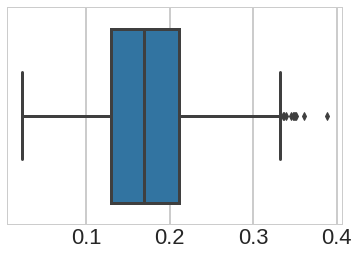

In [47]:
sb.boxplot(prob_range)

In [67]:
stats.describe(prob_range)

DescribeResult(nobs=1000, minmax=(0.023732413809857356, 0.3883428049758124), mean=0.17263444685602666, variance=0.003782458895828464, skewness=0.327927461049901, kurtosis=-0.05138351076587444)

In [87]:
def one_sided_p(coef_0, coef_end):
    '''Return the one-sided p value for a repeated measures t-test.'''

    #(t, p) = stats.ttest_rel(coef_0,coef_end)
    (t, p) = stats.ttest_ind(coef_0,coef_end)
    return p / 2
    

def cohend(d1, d2):
    '''Calculate Cohen's d, given by (u_d - u_0)/s_d,
    where u_d is the mean of the differences,
    s_d is the standard deviation of the differences,
    and u_0 = 0 for a null hypothesis of zero effect.'''
    
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

def plot_results(score_0, score_end, coef_0, coef_end):

    fig, ax = plt.subplots(1,2,figsize=(20,8), dpi=300, constrained_layout=True)

    g1a = sb.kdeplot(score_0, clip_on=False, shade=True, alpha=0.5, 
                    lw=1.5, bw=0.2, color = 'darkred', ax=ax[0])
    g1b = sb.kdeplot(score_end, clip_on=False, shade=True, alpha=0.5, 
                   lw=1.5, bw=0.2, color='blue', ax=ax[0])
    g1a.set_xlabel('Points margin', fontsize=24)
    g1a.set_ylabel('Density of occurences')
    g1a.legend(['Random choices','Using app recommendations'],frameon=True, framealpha=0.5, loc = 'upper left')

    g2a = sb.kdeplot(coef_0, clip_on=False, shade=True, alpha=0.5, 
                    lw=1.5, bw=0.2, color = 'darkred', ax=ax[1])
    g2b = sb.kdeplot(coef_end, clip_on=False, shade=True, alpha=0.5, 
                   lw=1.5, bw=0.2, color='blue', ax=ax[1])
    g2a.set_xlabel('Total score coefficient', fontsize=24)
    g2a.set_ylabel('Density of occurences')
    g2a.text(0.6,0.9,"Cohen's d:    {:.2G}\np-value:    {:.2G}".format(cohend(coef_end,coef_0), one_sided_p(coef_0,coef_end)),
             transform = ax[1].transAxes, bbox = dict(facecolor='white', edgecolor='lightgray', alpha=0.5))
    plt.show()

In [29]:
def plot_win_prob(coef_0, coef_end):

    fig = plt.subplots(figsize=(10,5), dpi=300)

    g2a = sb.distplot(coef_0, color = 'darkred')
    g2b = sb.distplot(coef_end,color='blue')
    g2a.set_xlabel('Match winning probability', fontsize=24)
    g2a.set_ylabel('Density of occurrences')
    g2a.text(0.8,1.55,"Cohen's d:    {:.2G}\np-value:    {:.2G}".format(cohend(coef_end,coef_0), one_sided_p(coef_0,coef_end)),
            bbox = dict(facecolor='white', edgecolor='lightgray', alpha=0.5), fontsize=18)
    g2a.legend(['Random choices','Using app'],frameon=True, framealpha=0.5, loc = 'upper left', fontsize = 18)
    #g2a.legend(['Random choices','Similar skills'],frameon=True, framealpha=0.5, loc = 'upper left', fontsize = 18)
    plt.show()

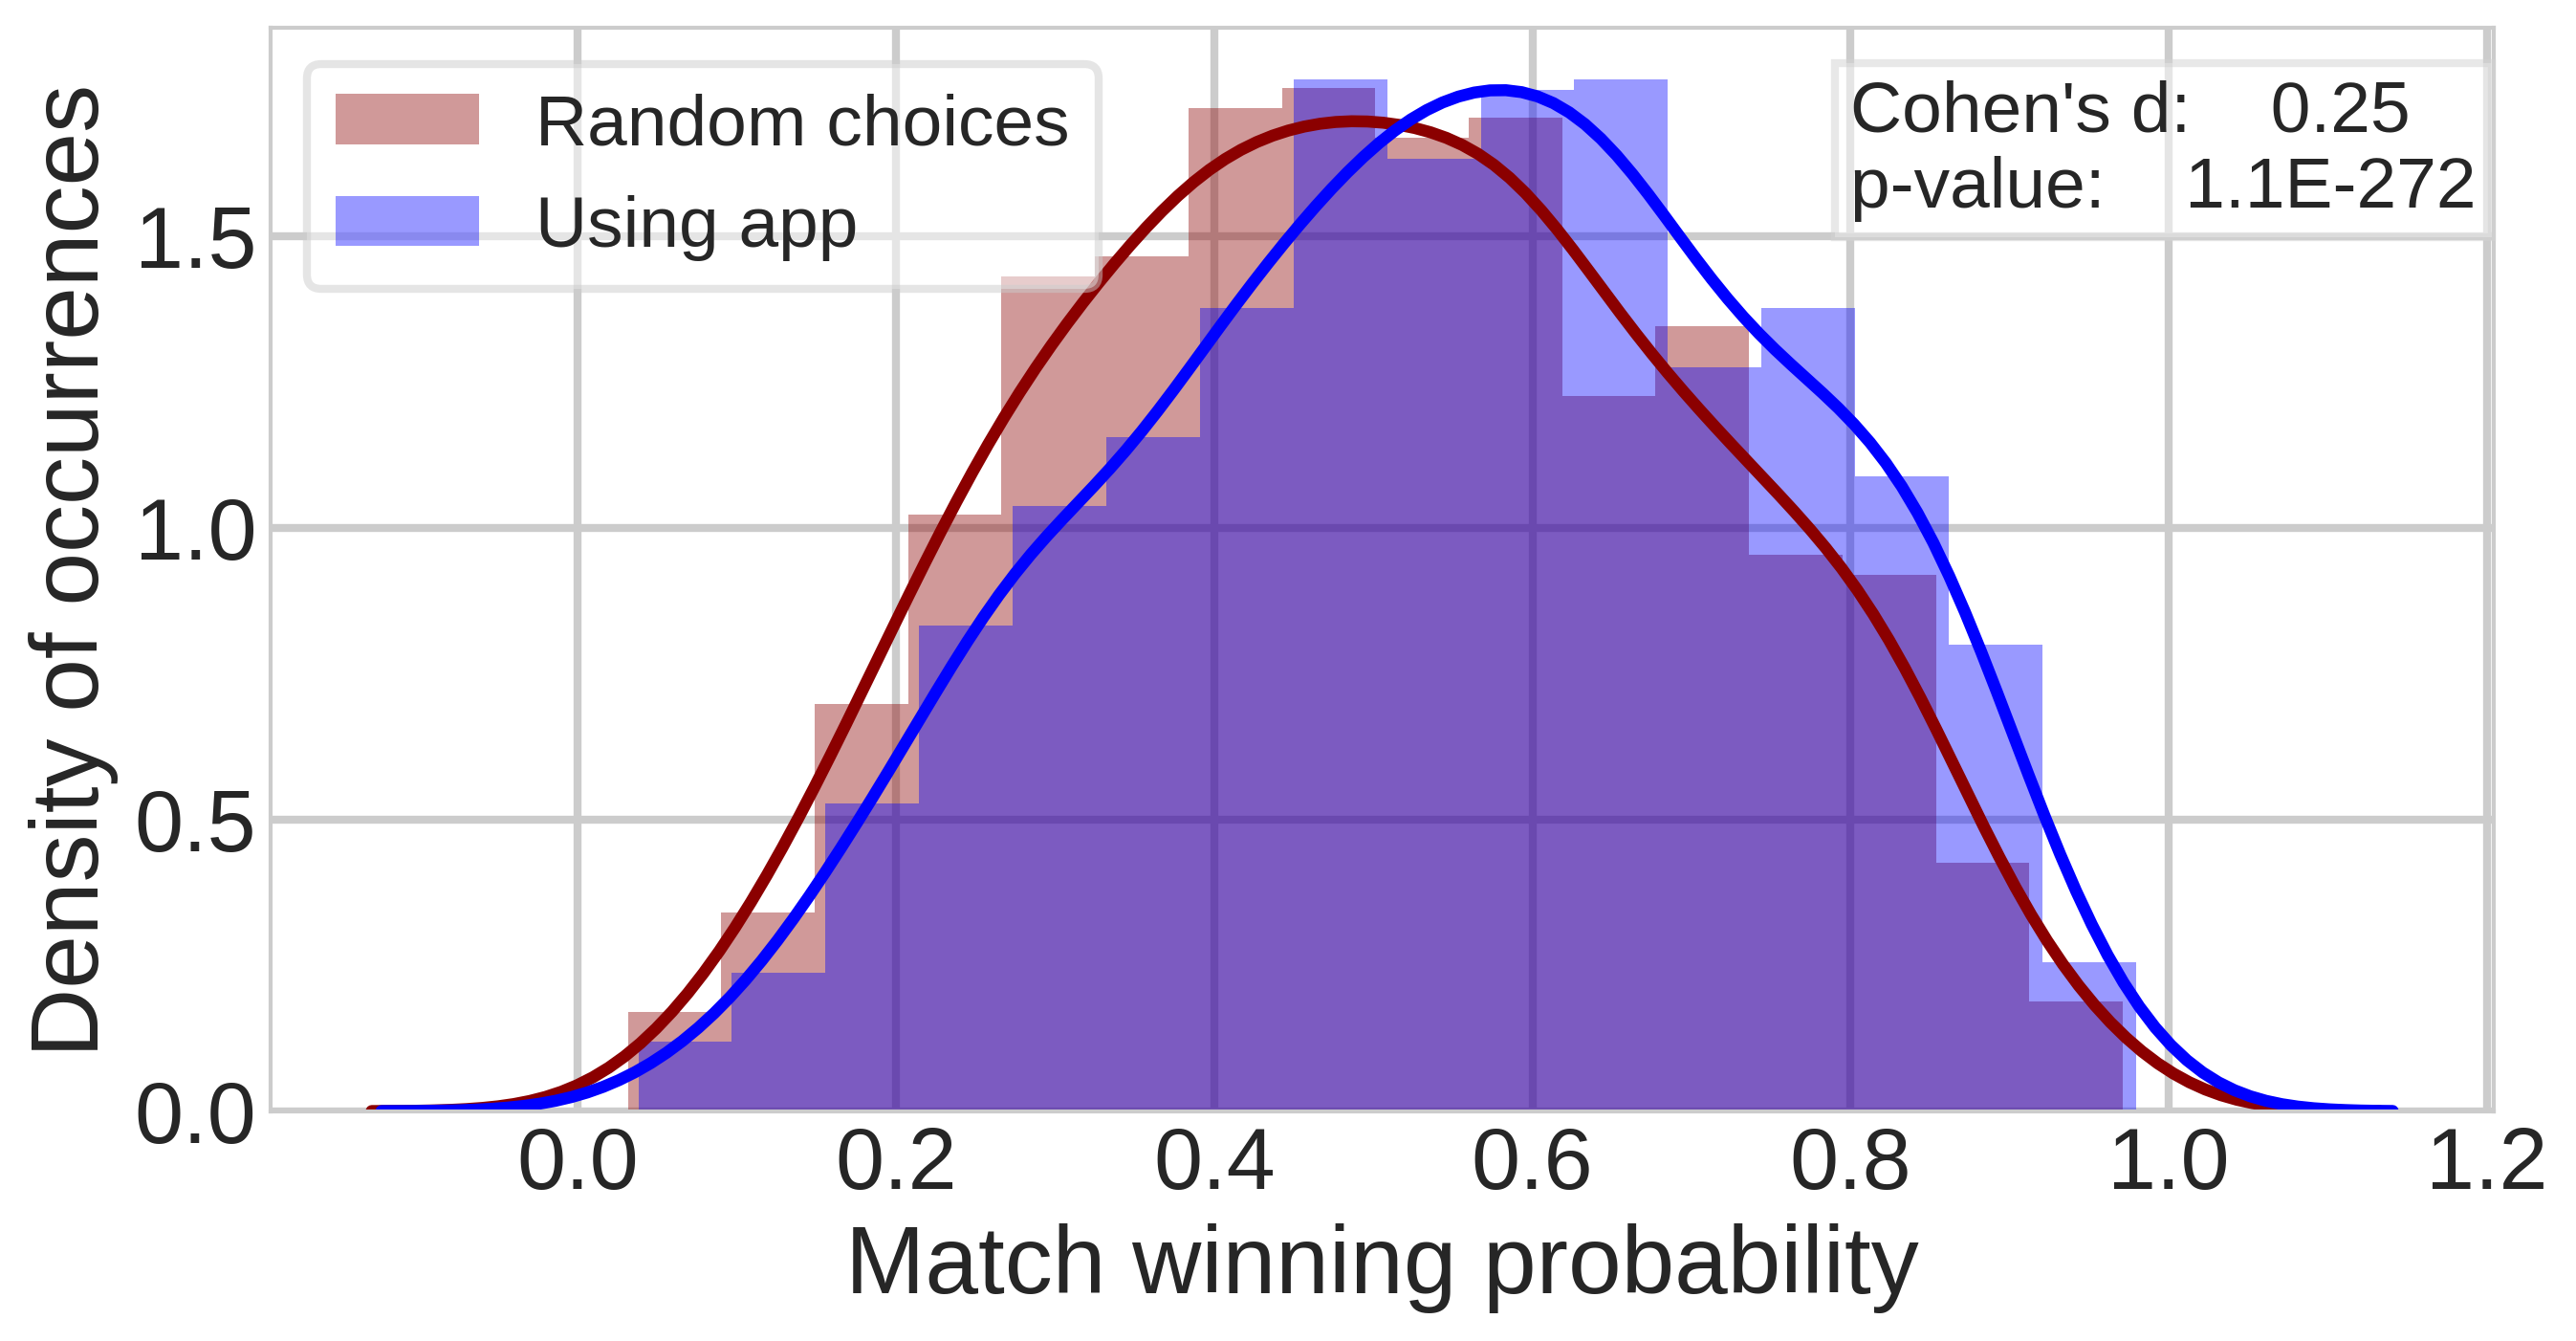

In [48]:
plot_win_prob(coef_0, coef_end)

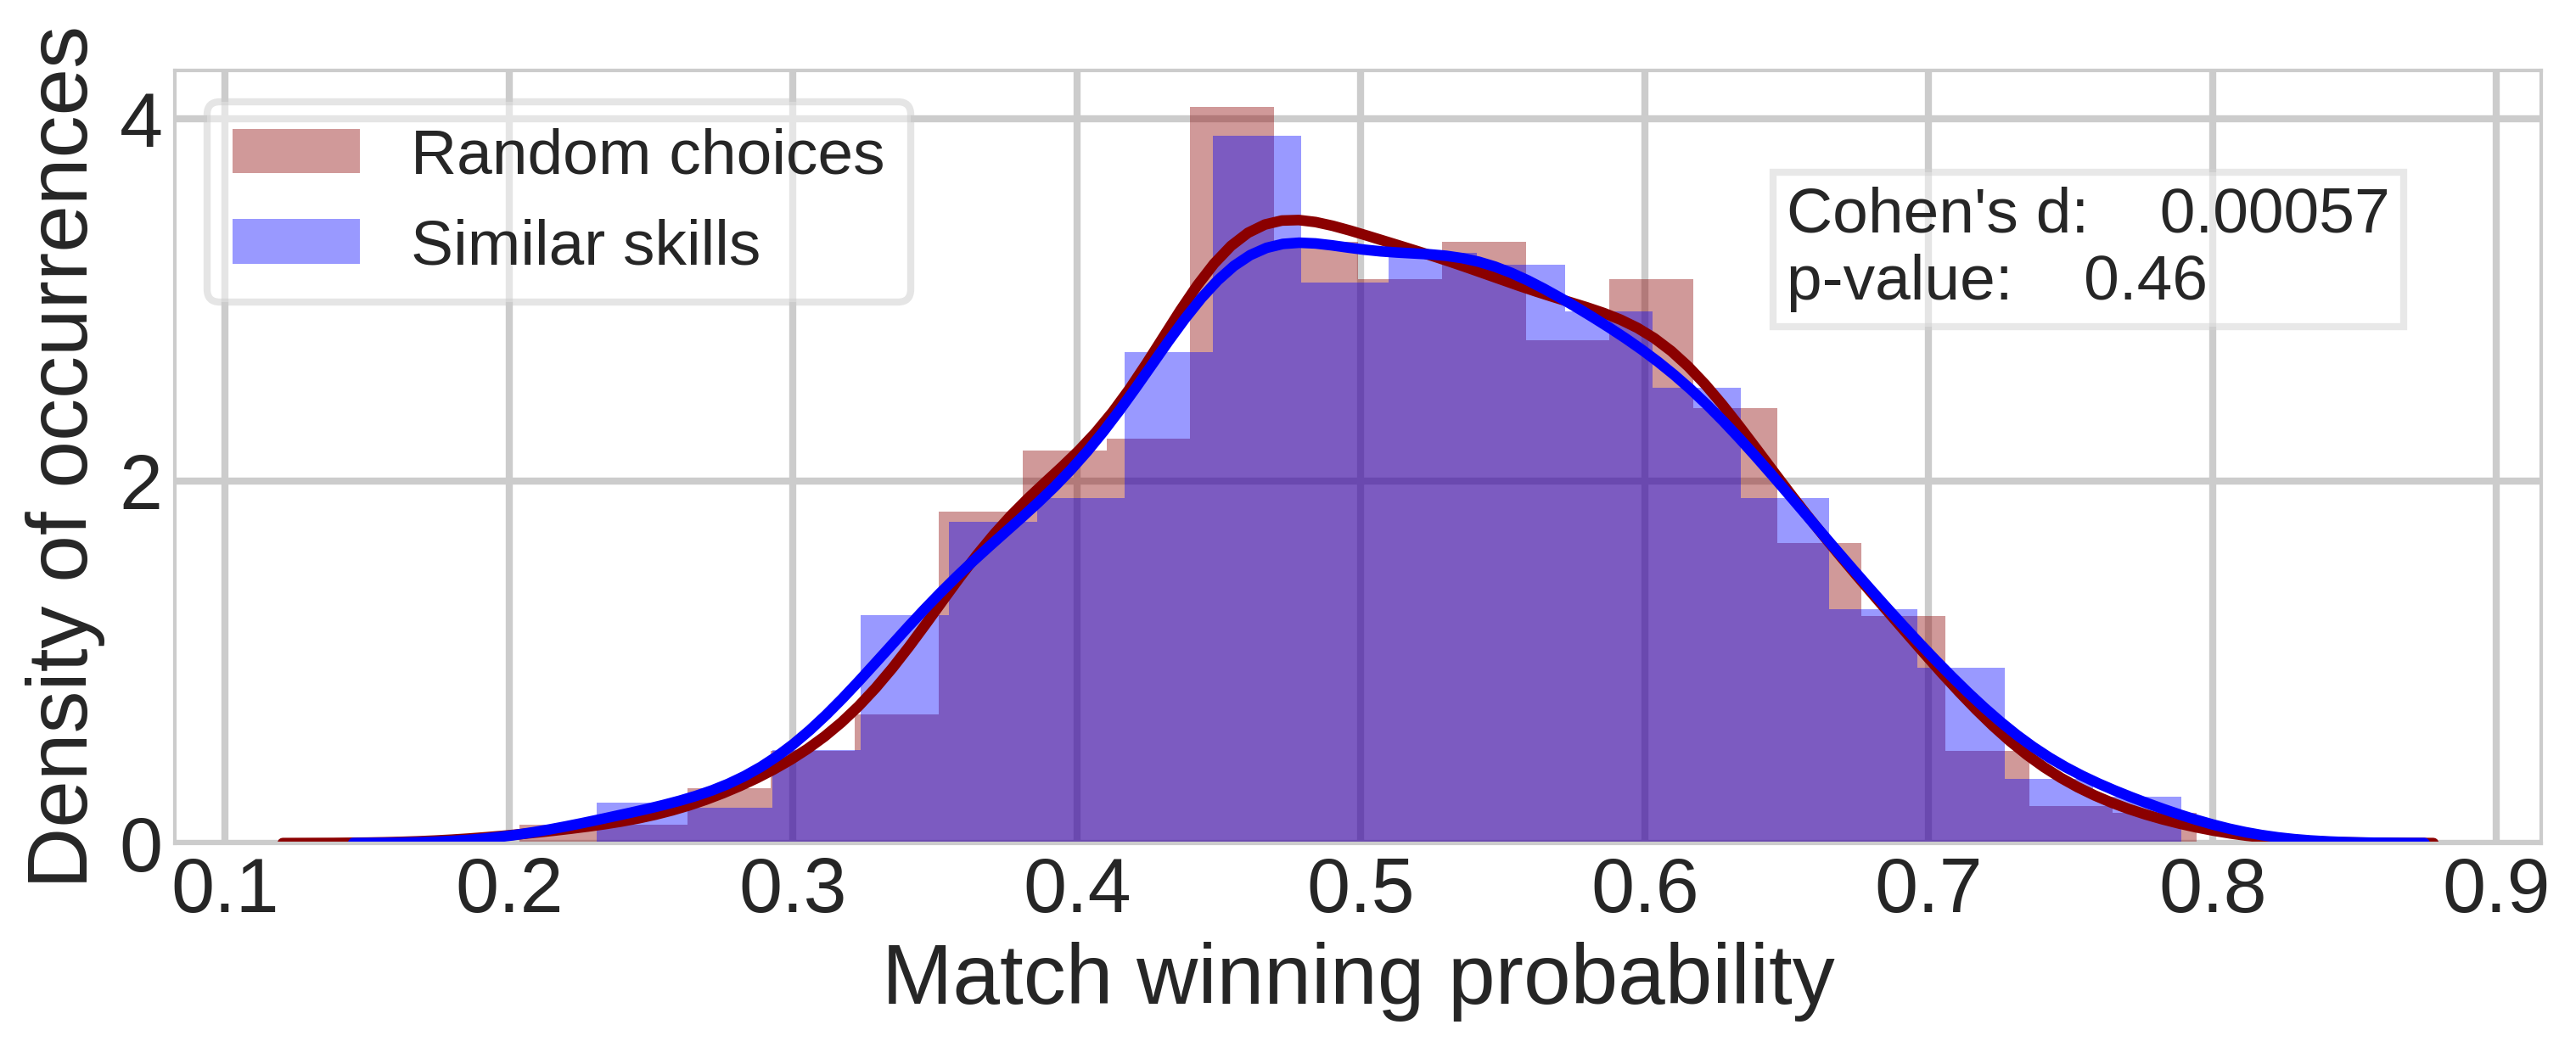

In [106]:
plot_win_prob(coef_00, coef_40)

In [11]:
from scipy import stats

In [93]:
def plot_results_diff(prob_diff0, prob_diff_sim, score_diff0, score_diff_sim):

    fig, ax = plt.subplots(1,2,figsize=(20,8), dpi=300, constrained_layout=True)

    g1a = sb.distplot(prob_diff0, color = 'blue', ax=ax[0])
    g1b = sb.distplot(prob_diff_sim, color = 'darkred', ax=ax[0])
    g1a.set_xlabel('Probability difference', fontsize=24)
    g1a.set_ylabel('Density of occurences')
    g1a.legend(['Using app recs','Similar skills'],frameon=True, framealpha=0.5, loc = 'upper left')

    g2a = sb.distplot(score_diff0, color = 'blue', ax=ax[1])
    g2b = sb.distplot(score_diff_sim, color = 'darkred', ax=ax[1])
    g2a.set_xlabel('Score difference', fontsize=24)
    g2a.set_ylabel('Density of occurences')
    
    g2a.text(0.65,0.9,"Cohen's d:    {:.2G}\np-value:    {:.2G}".format(cohend(score_diff0,score_diff_sim), one_sided_p(score_diff0,score_diff_sim)),
             transform = ax[1].transAxes, bbox = dict(facecolor='white', edgecolor='lightgray', alpha=0.5))
    plt.show()

In [76]:
coef_0 = np.array(coef_0)
coef_end = np.array(coef_end)
score_0 = np.array(score_0)
score_end = np.array(score_end)
ranks = np.array(ranks)

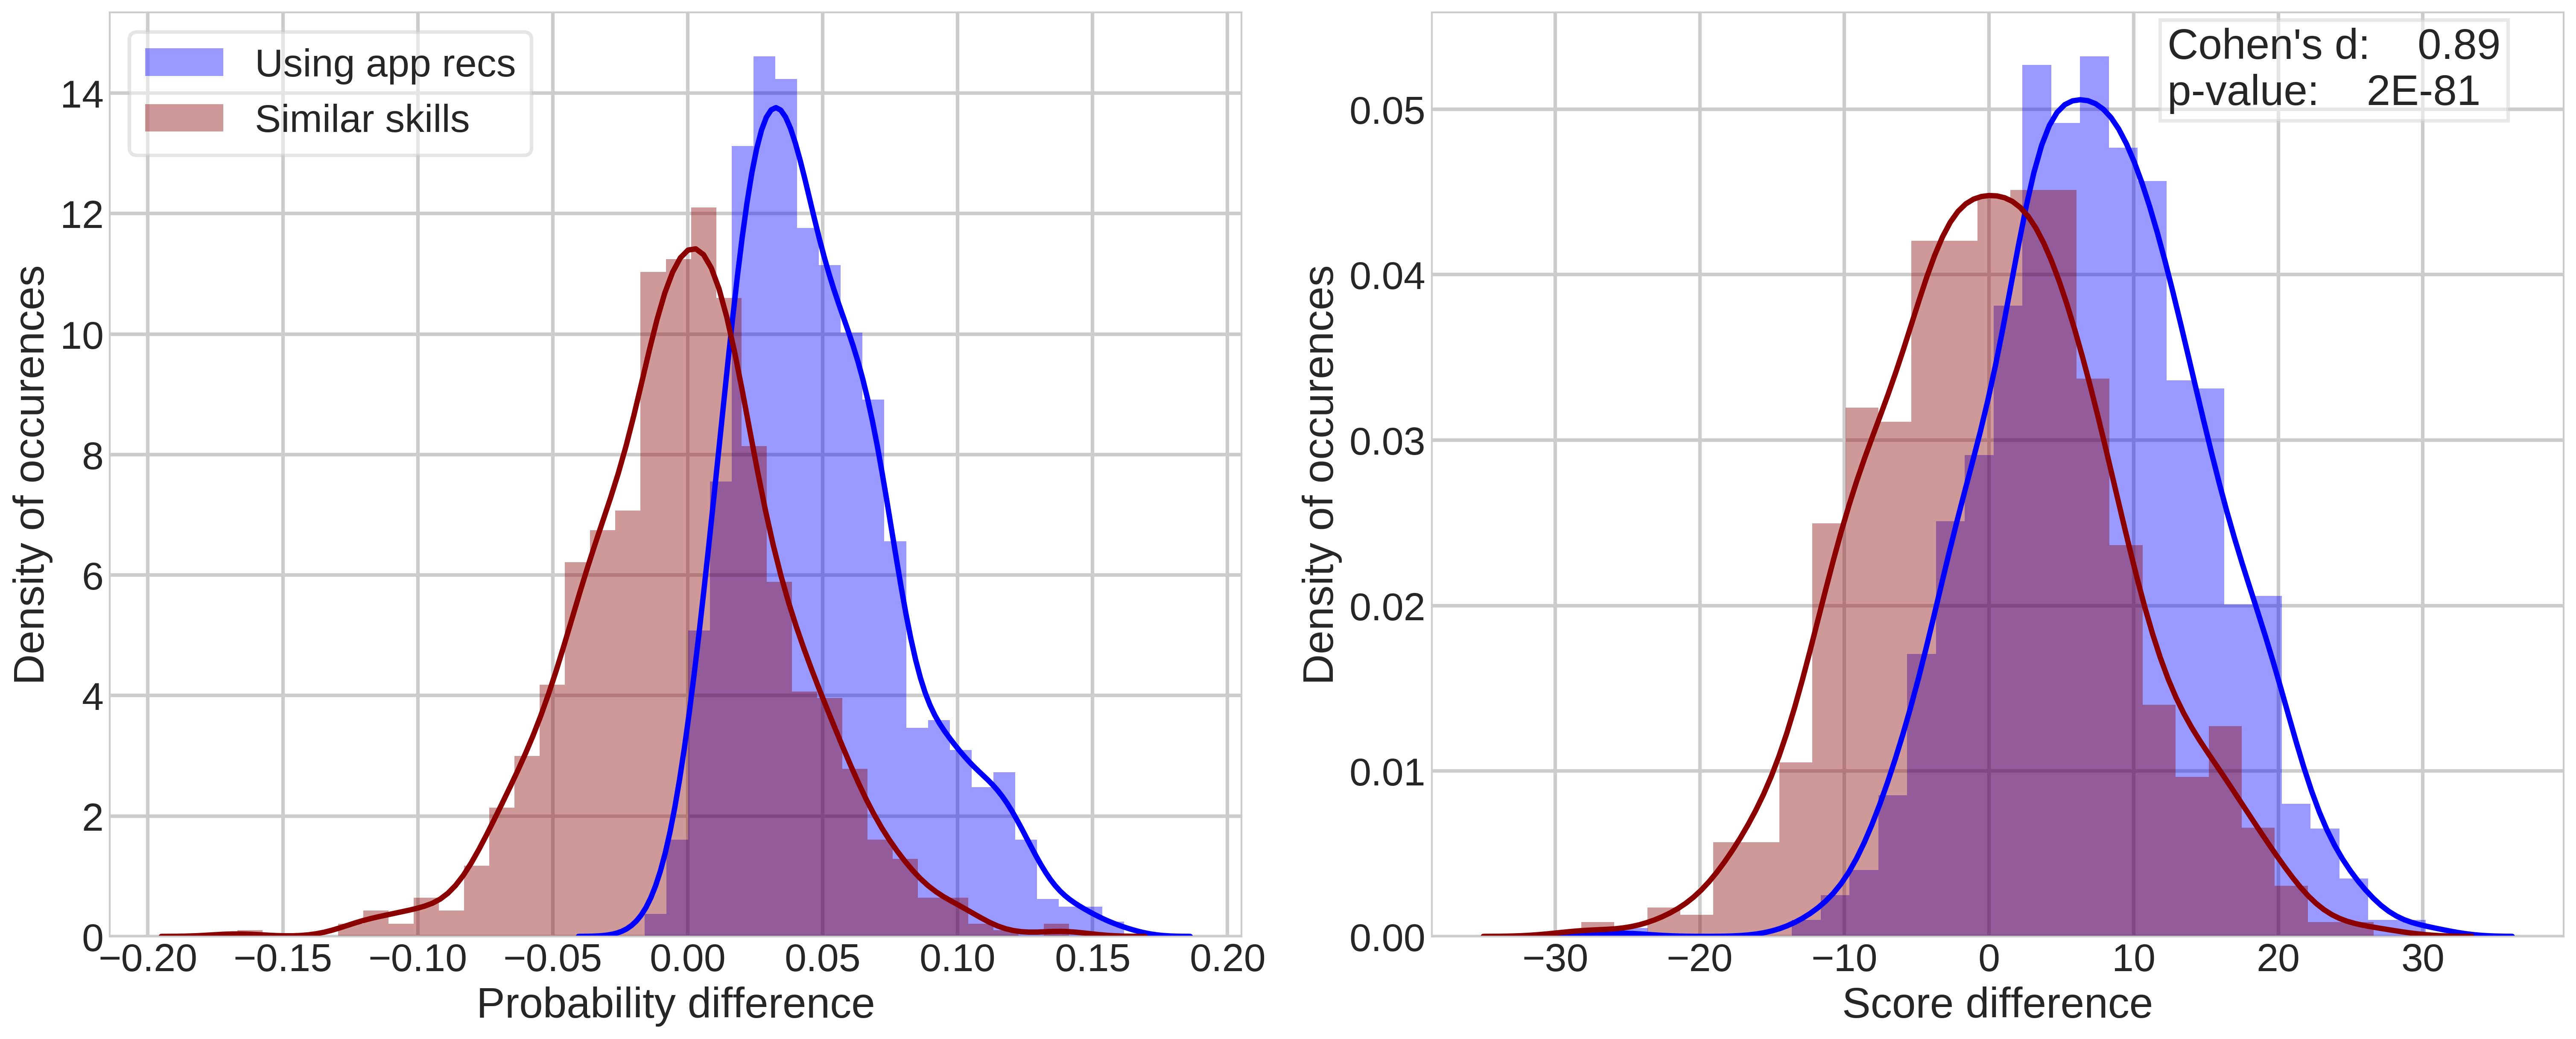

In [94]:
coef_diff_sim = coef_end -coef_0
score_diff_sim = score_end -score_0

plot_results_diff(coef_diff0, coef_diff_sim, score_diff0, score_diff_sim)

In [63]:
len(coef_diff[coef_diff>0])/len(coef_diff)*100

98.4

In [64]:
stats.shapiro(coef_diff)

(0.9568735361099243, 1.4181266477925872e-16)

In [84]:
print(stats.shapiro(score_diff0))
print(stats.shapiro(score_diff_sim))

(0.9975419640541077, 0.13880035281181335)
(0.9984477758407593, 0.520970344543457)


In [49]:
coef_0 = np.array(coef_0)
coef_end = np.array(coef_end)
score_0 = np.array(score_0)
score_end = np.array(score_end)
ranks = np.array(ranks)

In [68]:
print('Percentage winning outcomes with random choices: {} %'.format(len(score_0[score_0>0])/len(score_0) * 100))
print('Percentage winning outcomes using app: {} %'.format(len(score_end[score_end>0])/len(score_end) * 100))
print('Mean rank: {}'.format(np.mean(ranks)))

Percentage winning outcomes with random choices: 50.0 %
Percentage winning outcomes using app: 60.4 %
Mean rank: 17.509


In [69]:
print('Percentage winning outcomes with random choices: {} %'.format(len(coef_0[coef_0>0.5])/len(coef_0) * 100))
print('Percentage winning outcomes using app: {} %'.format(len(coef_end[coef_end>0.5])/len(coef_end) * 100))

Percentage winning outcomes with random choices: 49.8 %
Percentage winning outcomes using app: 60.199999999999996 %


In [112]:
print('Percentage winning outcomes with random choices: {} %'.format(len(score_00[score_00>0])/len(score_00) * 100))
print('Percentage winning outcomes using app: {} %'.format(len(score_40[score_40>0])/len(score_40) * 100))
print('Mean rank: {}'.format(np.mean(rank_00)))

Percentage winning outcomes with random choices: 54.6 %
Percentage winning outcomes using app: 52.2 %
Mean rank: 60.343


In [113]:
print('Percentage winning outcomes with random choices: {} %'.format(len(coef_00[coef_00>0.5])/len(coef_00) * 100))
print('Percentage winning outcomes using app: {} %'.format(len(coef_40[coef_40>0.5])/len(coef_40) * 100))

Percentage winning outcomes with random choices: 54.50000000000001 %
Percentage winning outcomes using app: 54.800000000000004 %


In [121]:
def plot_ranks(rank_0, rank_1):

    fig = plt.subplots(figsize=(10,4), dpi=300, constrained_layout=True)

    g2a = sb.distplot(rank_0, color = 'darkred', kde=False)
    g2b = sb.distplot(rank_1,color='blue', kde=False)
    g2a.set_xlabel('Permutation rank', fontsize=24)
    g2a.set_ylabel('Frequency density')
    #g2a.text(0.65,3,"Cohen's d:    {:.2G}\np-value:    {:.2G}".format(cohend(coef_end,coef_0), one_sided_p(coef_0,coef_end)),
    #        bbox = dict(facecolor='white', edgecolor='lightgray', alpha=0.5), fontsize=18)
    g2a.legend(['Random choices','Using app'],frameon=True, framealpha=0.5, loc = 'upper right', fontsize = 18)
    #g2a.legend(['Random choices','Similar skills'],frameon=True, framealpha=0.5, loc = 'upper left', fontsize = 18)
    plt.show()

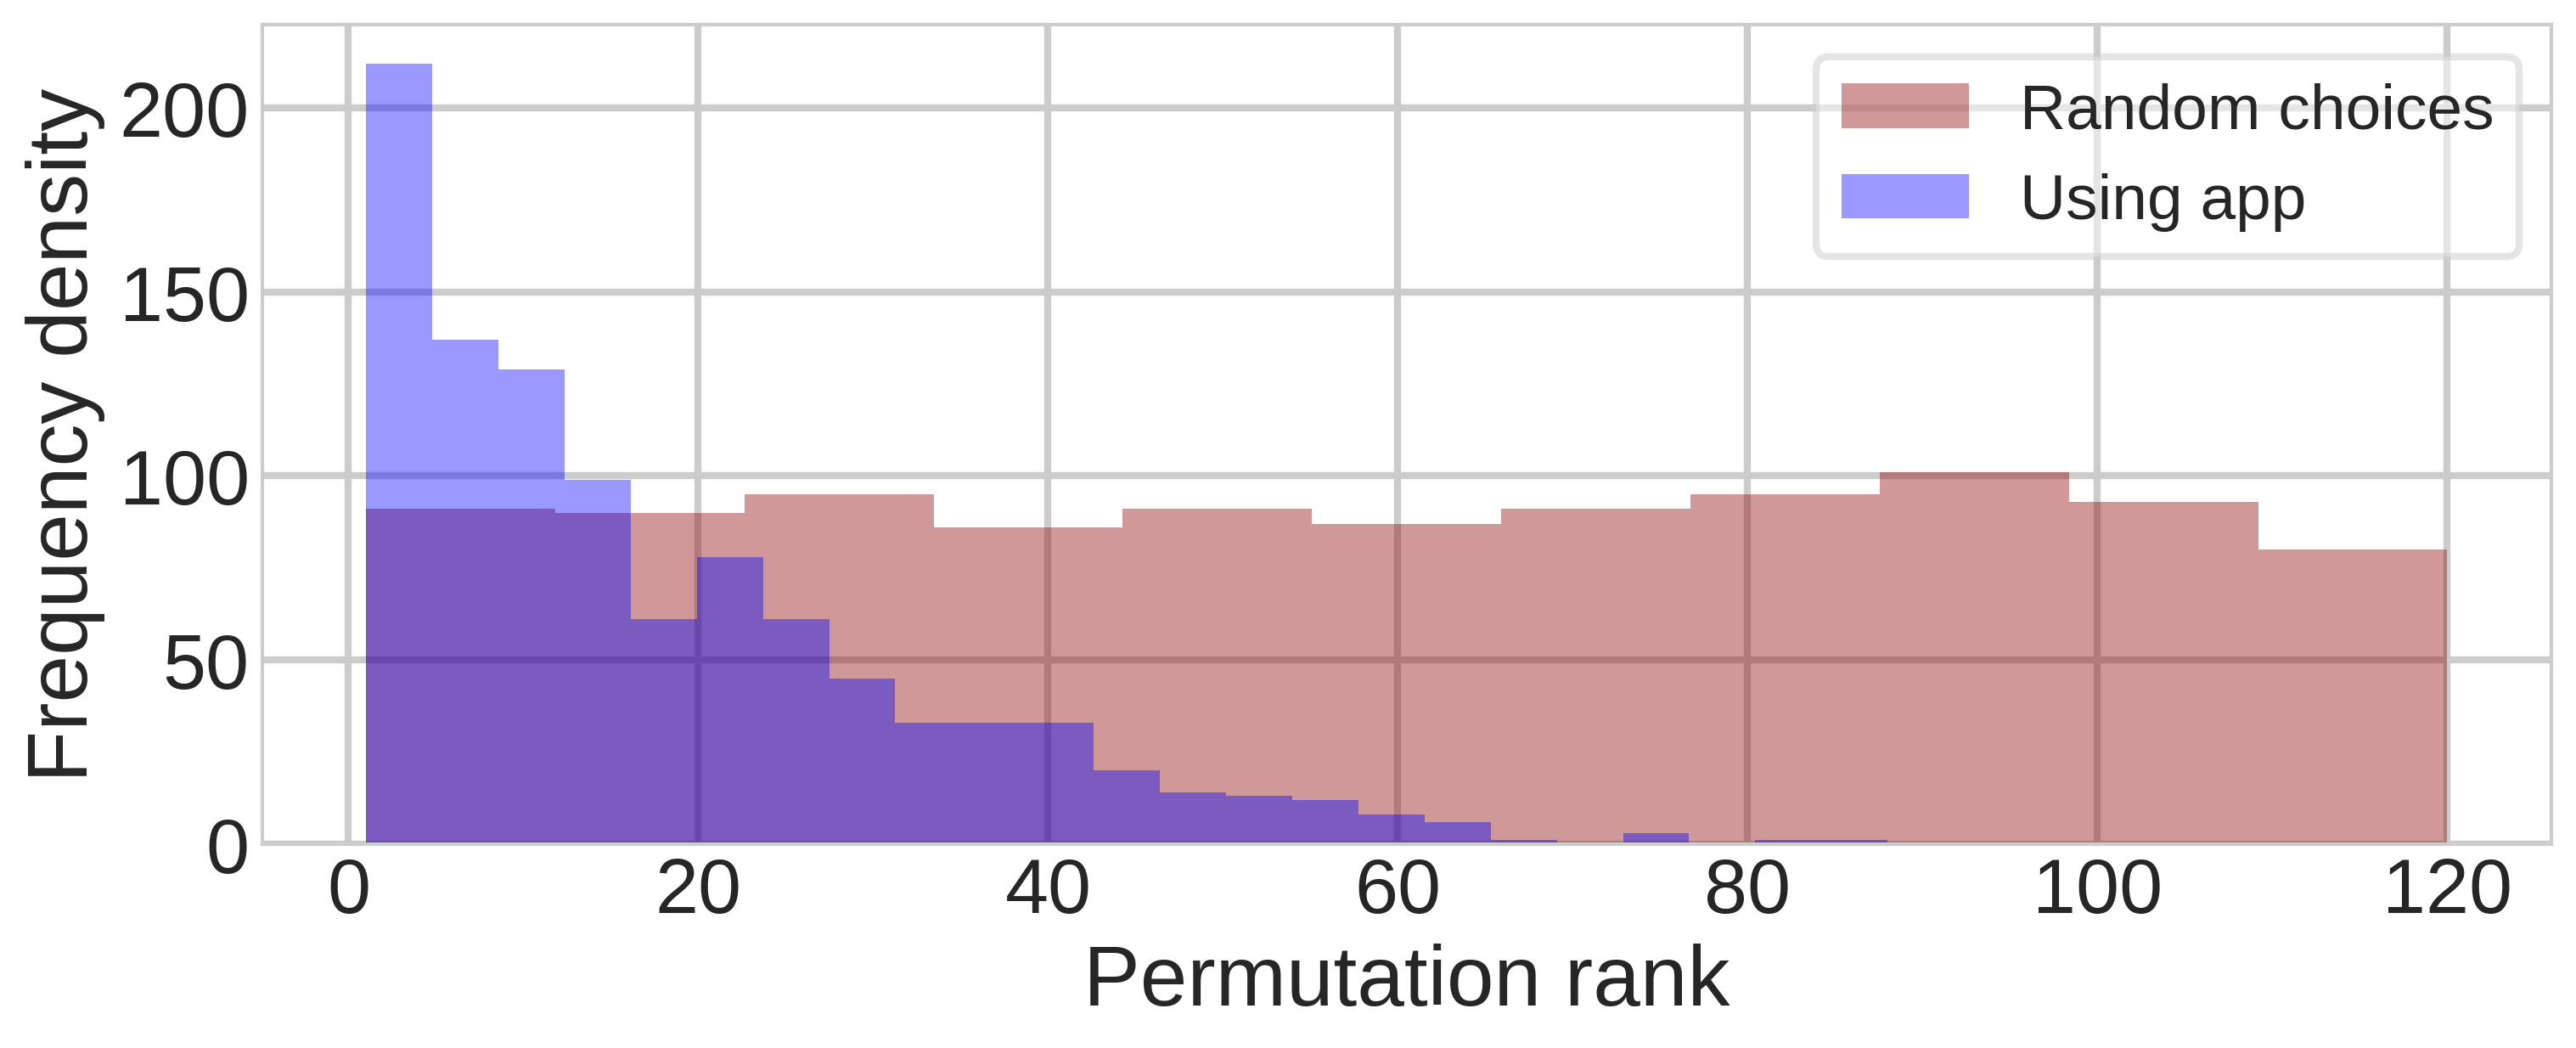

In [122]:
plot_ranks(rank_00, ranks)

In [110]:
results_00 = pd.read_csv('results_prob0.csv',index_col=0)

coef_00 = results_00['round_0'].values
coef_40 = results_00['round_4'].values
score_00 = results_00['score_0'].values
score_40 = results_00['score_4'].values
rank_00 = results_00['ranks'].values

#plot_results(score_b0, score_b4, coef_b0, coef_b4)